Data Extraction dan Data Preprocess

<ipython-input-14-4ddde06a9078>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


   humidity  kelembabanTanah  tdsValue  temperature waterLevel      time
0        50         60.75702       288           34       High  13:13:24
1        52         61.19658       182           33       High  10:59:24
2        52         61.31868       181           33       High  10:58:24
3        52         61.34310       182           33       High  10:57:24
4        52         61.34310       180           33       High  10:55:24


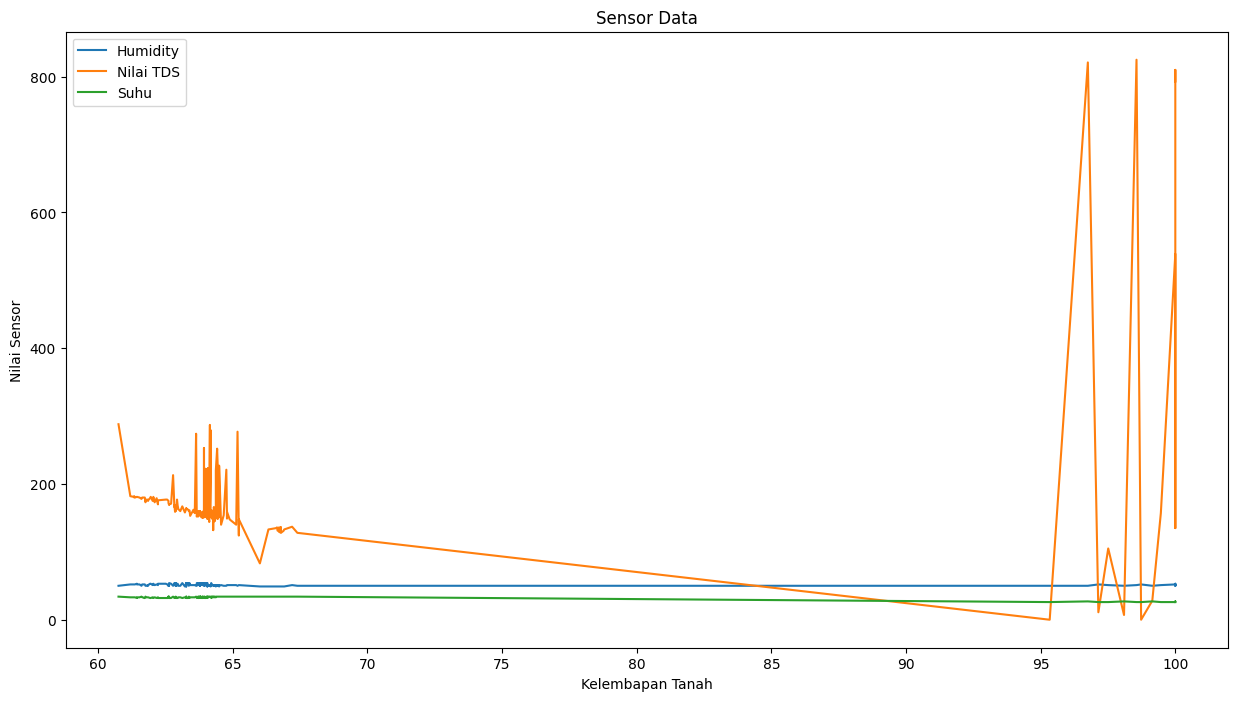

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON
with open('data/db-export.json', 'r') as file:
    data = json.load(file)

historical_data = data['historicalData']
df = pd.DataFrame.from_dict(historical_data, orient='index')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time'] = df['timestamp'].dt.time

df.drop(columns=['timestamp'], inplace=True)

# Sort berdasarkan kelembapan tanah
df.sort_values(by='kelembabanTanah', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())

# Visualisasikan data menggunakan matplotlib
plt.figure(figsize=(15, 8))
plt.plot(df['kelembabanTanah'], df['humidity'], label='Humidity')
plt.plot(df['kelembabanTanah'], df['tdsValue'], label='Nilai TDS')
plt.plot(df['kelembabanTanah'], df['temperature'], label='Suhu')
plt.xlabel('Kelembapan Tanah')
plt.ylabel('Nilai Sensor')
plt.title('Sensor Data')
plt.legend()
plt.show()

# Save dataframe
df.to_csv('historical_data.csv', index=False)

Model Training menggunakan Linear Regression

Model score: 0.8471102969540856


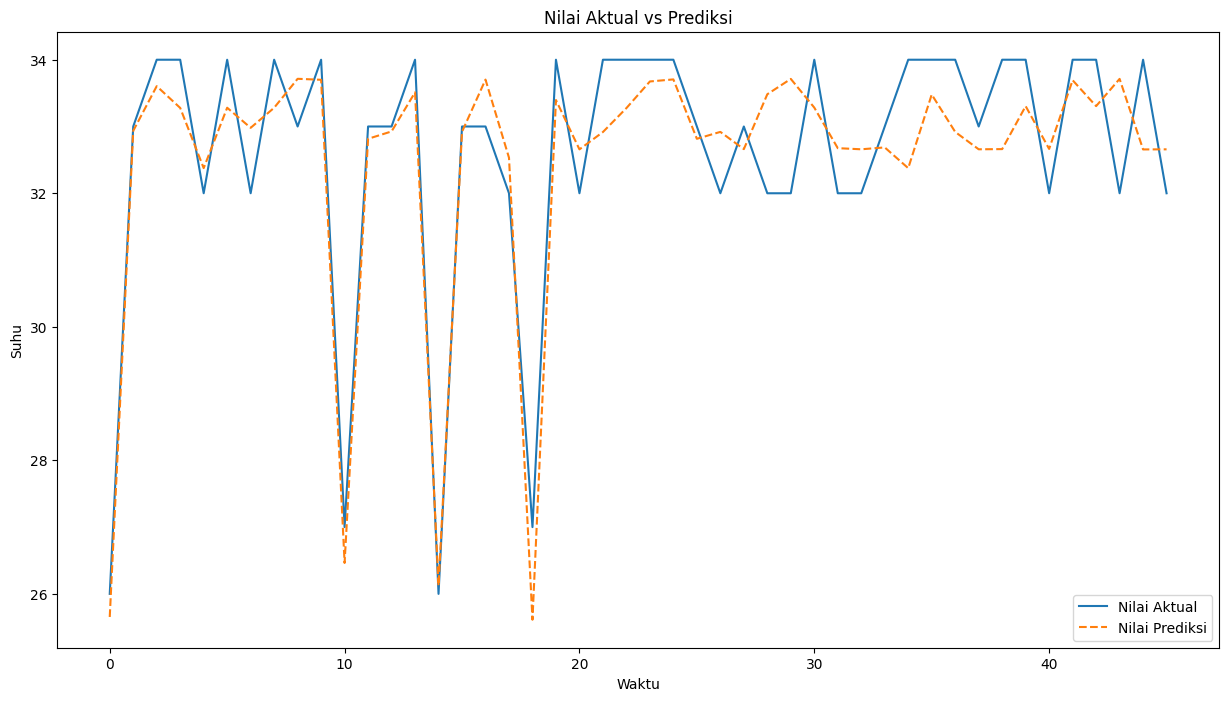

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import joblib

features = df[['humidity', 'kelembabanTanah', 'tdsValue', 'temperature']]
target = df['temperature'].shift(-1).fillna(method='ffill')

# Memisahkan data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'temperature_forecast_model.pkl')

print("Model score:", model.score(X_test, y_test))

# Prediksi
y_pred = model.predict(X_test)

plt.figure(figsize=(15, 8))
plt.plot(range(len(y_test)), y_test, label='Nilai Aktual')
plt.plot(range(len(y_pred)), y_pred, label='Nilai Prediksi', linestyle='dashed')
plt.xlabel('Waktu')
plt.ylabel('Suhu')
plt.title('Nilai Aktual vs Prediksi')
plt.legend()
plt.show()